In [48]:
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
filename = '/Users/pvn/Library/CloudStorage/OneDrive-OakRidgeNationalLaboratory/Shared/Projects/SETx-FluxData/EddyPro_outputs/eddypro_1_full_output_2025-09-05T192824_adv.csv'
df = pd.read_csv(f'{filename}', skiprows=4, header=None)

In [44]:
with open(filename, "r", encoding="latin-1") as f:
    meta_lines = [next(f) for _ in range(3)]  # header lines

In [45]:
columns =  meta_lines[1].strip().split(',')
columns = [c.strip('"') for c in columns]
df.columns = columns
df["datetime"] = pd.to_datetime(df["date"] + " " + df["time"])

units =  meta_lines[2].strip().split(',')
units = [u.strip('"') for u in units]


In [46]:
vars = ['LE', 'H', 'co2_flux', 'h2o_flux', 'ch4_flux']
colors = [
    "#4e79a7",  # deep blue
    "#f28e2b",  # vivid orange
    "#59a14f",  # fresh green
    "#e15759",  # bright red
    "#76b7b2",  # teal
    "#edc949",  # yellow
    "#af7aa1",  # muted purple
    "#ff9da7"   # soft pink
]

In [76]:
vmin = [-50, -50, -30, -5, -.2]
vmax = [800, 300, 30, 20, .2]

/var/folders/5t/zy7vw0s50pdbmspg54cwyj1mqbzrzg/T/ipykernel_55778/1701210489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data == -9999] = np.nan


Text(0.5, 0, 'Time')

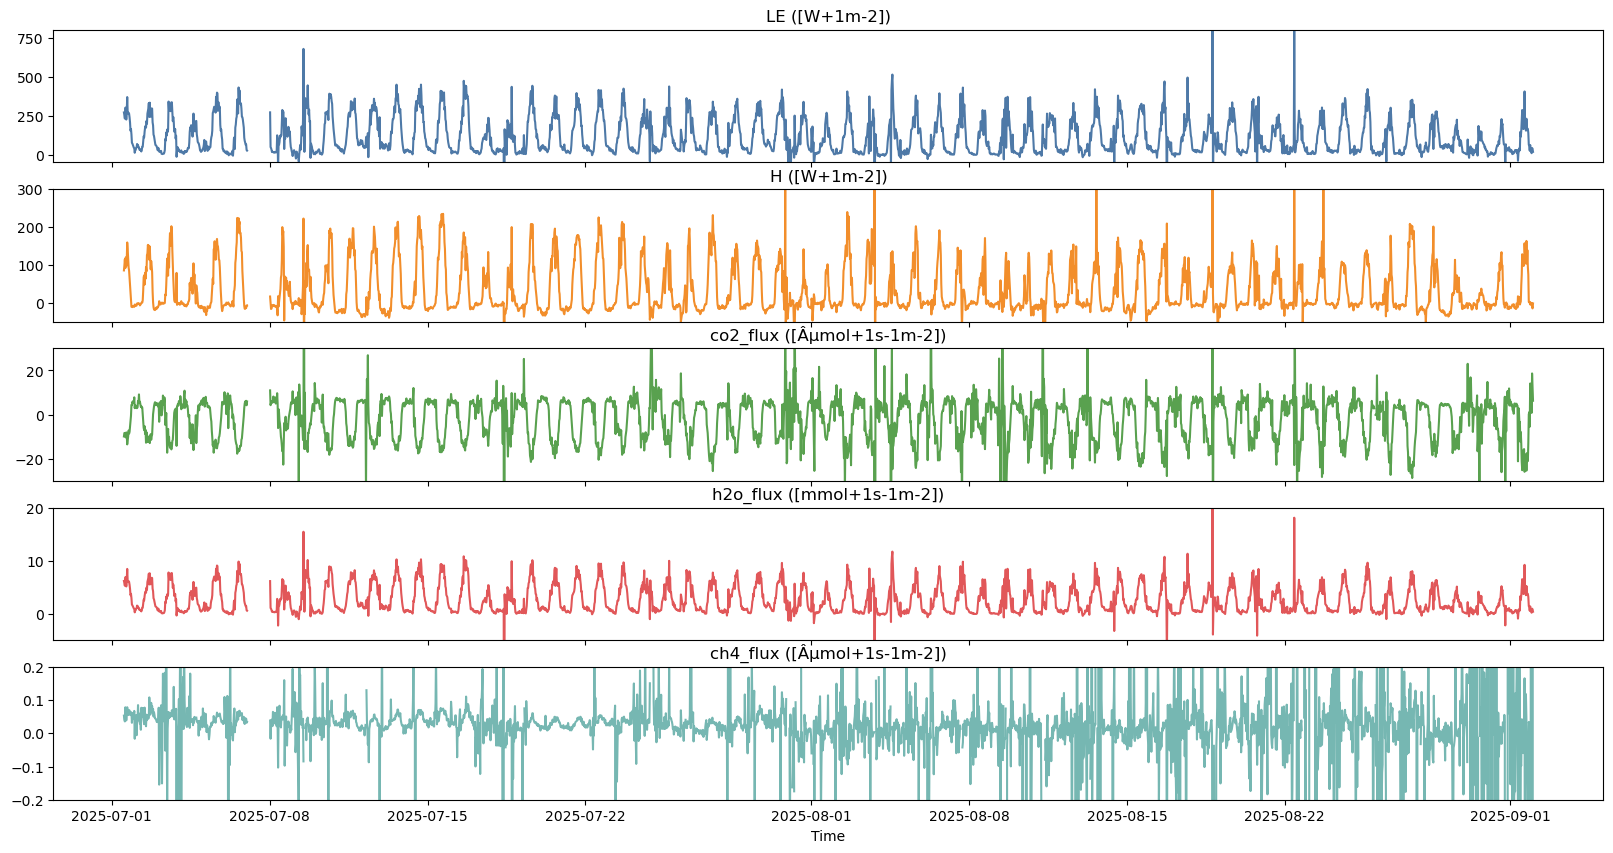

In [77]:
fig, ax = plt.subplots(len(vars), 1, figsize=(20, 2*len(vars)), sharex=True)
for k, var in enumerate(vars):
    u = units[columns.index(var)]
    data = df[var]
    data[data == -9999] = np.nan
    ax[k].plot(df['datetime'], data, colors[k])
    ax[k].set_title(f'{var} ({u})')
    ax[k].set_ylim([vmin[k], vmax[k]])
plt.xlabel('Time')